# Visualización con IPython Widgets

**NOTA: En conda viene instalado, en Python debería instalarse como [muestra la documentación](http://ipywidgets.readthedocs.io/en/latest/user_install.html)**


IPython provee widgets interactivos, veamos un ejemplo:

In [2]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

In [9]:
def f(x):
    return x
interact(f, x=3)

3

<function __main__.f>

In [3]:
def g(s):
    return s.title()

interact(g, s="Escriba algo")

<function __main__.g>

### Definiendo rangos

In [4]:
def f(x):
    return x
interact(f, x=(-100, 100, 2.5))

<function __main__.f>

Podemos también utilizar múltiples valores y argumentos nombrados.

In [5]:
def h(veces, cadena, sino):
    if sino:
        return veces * cadena
interact(h, veces=(1, 80), cadena="*", sino=True)

<function __main__.h>

### Algunos ejemplos


In [23]:
!conda install -y sympy

Fetching package metadata .......
Solving package specifications: ..........
Using Anaconda Cloud api site https://api.anaconda.org

# All requested packages already installed.
# packages in environment at /Users/nahuel/anaconda/envs/default:
#
sympy                     1.0                      py35_0  


In [26]:
# Decirle a SymPy que se haga amigo del notebook :)
from sympy import init_printing
init_printing()

# Función de factorización
from sympy import Symbol, Eq, factor
x = Symbol('x')
def factorit(n):
    return Eq(x ** n - 1, factor(x ** n - 1))

# Make it interactive!

interact(factorit, n=(2, 20))

<function __main__.factorit>

## Interact como decorador

In [13]:
@interact(x=(1, 100))
def decorada(x):
    return x * x

2500

### Otros ejemplos

<IPython.core.display.Javascript object>


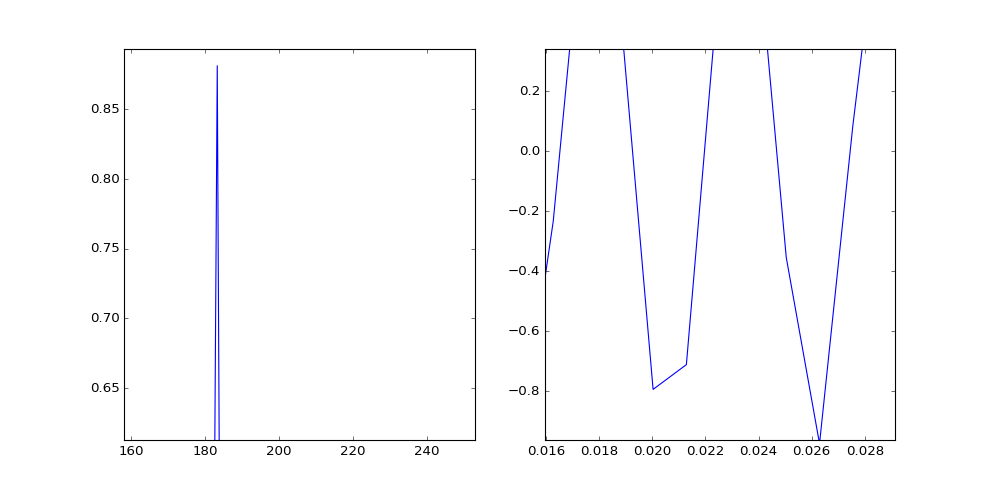

/Users/nahuel/anaconda/envs/default/lib/python3.5/site-packages/ipykernel/__main__.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [11]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

def mostrar_fft(freq):
    # número de muestras
    N = 600
    # espacio entre muestras
    T = 1.0 / 800.0 # bastante mala diría Nyquist
    x = np.linspace(0.0, N*T, N)
    y = np.sin(freq * 2.0*np.pi*x) # + 0.5*np.sin(80.0 * 2.0*np.pi*x)
    yf = scipy.fftpack.fft(y)
    xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

    fig, ejes = plt.subplots(1, 2)  # Dos graficos
    ejes[1].plot(x, y) # Dibujamos la onda
    ejes[0].plot(xf, 2.0/N * np.abs(yf[:N/2]))  # Y su espectro
    plt.show()

interact(mostrar_fft, freq=(1, 400))

### Utilizando los widgets para generar formularios interactivos

In [6]:
from ipywidgets import Layout, Box, Label, IntSlider, Dropdown, FloatText, Textarea

label_layout = Layout()

form_item_layout = Layout(
    display='flex',
    flex_flow='row',
    justify_content='space-between'
)

form_items = [
    Box([Label(value='Edad del capitan'), IntSlider(min=40, max=60)], layout=form_item_layout),
    Box([Label(value='¿Cómo le gustan los huevos?'),
         Dropdown(options=['Revueltos', 'Fritos', 'Duros'])], layout=form_item_layout),
    Box([Label(value='Tamaño de la embarcación'),
         FloatText()], layout=form_item_layout),
    Box([Label(value='Información'),
         Textarea()], layout=form_item_layout)
]

form = Box(form_items, layout=Layout(
    display='flex',
    flex_flow='column',
    border='solid 2px',
    align_items='stretch',
    width='50%'
))
form

### Ejercitación proupuesta

 * Quienes estén haciendo el curso de STR, creen un notebook que utilice interact y matplotlib (tema siguiente) para dibujar la planificabilidad de un STR mostrando la asingación temporal.
 * Realice un gráfico de tiempo de respuesta de pings a un dominio (interact con un campo de texto indicando el dominio)
 